In [6]:
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display

# Set the seed value for experiment reproducibility.
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

## Load dataset

In [7]:
#df = pd._read_csv("GPS_cmd_16k_renamed_jpynb_crepe.csv")
path = "../GPS_cmd_16k_renamed_jpynb.list"
list_gps = utils_io.read_txt(path)

In [8]:
len(list_gps)

4000

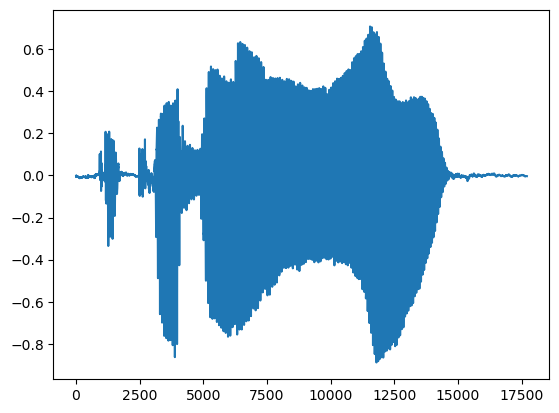

In [10]:
test_file = tf.io.read_file(DATASET_PATH+'/down/0a9f9af7_nohash_0.wav')
test_audio, _ = tf.audio.decode_wav(contents=test_file)
test_audio.shape

In [ ]:
batch_size, num_samples, sample_rate = 32, 32000, 16000.0
# A Tensor of [batch_size, num_samples] mono PCM samples in the range [-1, 1].
pcm = tf.random.normal([batch_size, num_samples], dtype=tf.float32)

# A 1024-point STFT with frames of 64 ms and 75% overlap.
stfts = tf.signal.stft(pcm, frame_length=1024, frame_step=256,
                       fft_length=1024)
spectrograms = tf.abs(stfts)

# Warp the linear scale spectrograms into the mel-scale.
num_spectrogram_bins = stfts.shape[-1].value
lower_edge_hertz, upper_edge_hertz, num_mel_bins = 80.0, 7600.0, 80
linear_to_mel_weight_matrix = tf.signal.linear_to_mel_weight_matrix(
  num_mel_bins, num_spectrogram_bins, sample_rate, lower_edge_hertz,
  upper_edge_hertz)
mel_spectrograms = tf.tensordot(
  spectrograms, linear_to_mel_weight_matrix, 1)
mel_spectrograms.set_shape(spectrograms.shape[:-1].concatenate(
  linear_to_mel_weight_matrix.shape[-1:]))

# Compute a stabilized log to get log-magnitude mel-scale spectrograms.
log_mel_spectrograms = tf.math.log(mel_spectrograms + 1e-6)

# Compute MFCCs from log_mel_spectrograms and take the first 13.
mfccs = tf.signal.mfccs_from_log_mel_spectrograms(
  log_mel_spectrograms)[..., :13]

Reference: 
- https://www.tensorflow.org/tutorials/audio/simple_audio?hl=pt-br
- https://medium.com/@oluyaled/audio-classification-using-deep-learning-and-tensorflow-a-step-by-step-guide-5327467ee9ab
- https://www.tensorflow.org/api_docs/python/tf/signal/mfccs_from_log_mel_spectrograms
- https://www.tensorflow.org/api_docs/python/tf/signal/stft